# Q-Learning Demo with GridDockEnv

This notebook demonstrates training a Q-learning agent 
in our customizable GridDock environment, using utility 
functions for training and visualization.


In [1]:
# 1) ensure Python can see your project root
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt


# if this notebook lives in project_root/notebooks,
# one '..' gets you back to project_root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("→ Added to sys.path:", project_root)
print("→ cwd is:", os.getcwd())

from utils.rl_utils import *
from environments.grid_env  import GridEnv
from agents.q_learning_agent import QLearningAgent
from agents.dqn_agent import DQNAgent
from utils.graphics_utils import *

→ Added to sys.path: /Users/eirikvarnes/code/auv-rl-project
→ cwd is: /Users/eirikvarnes/code/auv-rl-project/notebooks
pygame 2.6.1 (SDL 2.28.4, Python 3.11.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Initialize environment and agent
grid_size = (5, 5)
spawn_mode = 'random'  # or 'static'
env = GridEnv(grid_size=grid_size, spawn_mode=spawn_mode)
q_agent = QLearningAgent(env)


In [3]:
# Train agent
episodes = 50000
max_steps = 100
rewards = q_agent.train()

Training: 100%|██████████| 10000/10000 [00:00<00:00, 17470.42it/s]


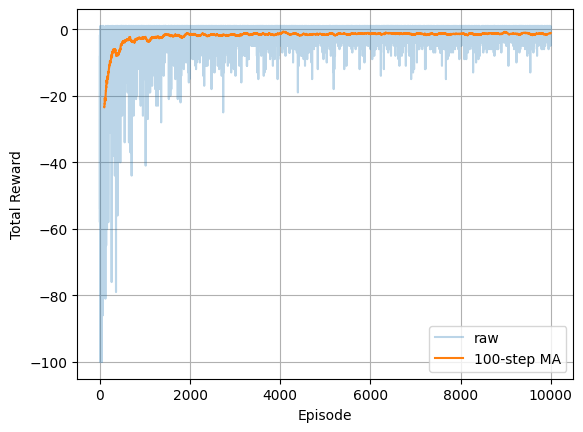

In [4]:
# Plot results
plot_rewards(rewards, window=100)

In [4]:
success_rate, avg_steps = evaluate_agent(env, q_agent,
                                         episodes=2000,
                                         max_steps=200)
print(f"Success rate: {success_rate*100:.1f}%")
print(f"Avg steps when successful: {avg_steps:.1f}")


NameError: name 'q_agent' is not defined

In [5]:
# ─ Animate ────────────────────────────────────────
animate_agent_matplotlib(env, q_agent, max_steps=200, delay=0.1, figsize=(6,6))

NameError: name 'q_agent' is not defined

In [6]:
# ─ Configure env & agent ─────────────────────────
env = GridEnv(grid_size=(20,20), spawn_mode='random')
q_agent = QLearningAgent(env,
                       alpha=0.2,
                       gamma=0.9,
                       epsilon=1.0,
                       epsilon_min=0.01,
                       epsilon_decay=0.999)

# ─ Train ──────────────────────────────────────────
rewards = q_agent.train(
    episodes=100000
)
plot_rewards(rewards, window=100)
q_agent.save("../models/q_table.npy")

IndexError: invalid index to scalar variable.

In [7]:
# ─ Animate ────────────────────────────────────────
animate_agent_matplotlib(env, q_agent, max_steps=50, delay=0.1, figsize=(6,6))

NameError: name 'q_agent' is not defined

In [17]:
success_rate, avg_steps = evaluate_agent(env, q_agent,
                                         episodes=10000,
                                         max_steps=200)
print(f"Success rate: {success_rate*100:.1f}%")
print(f"Avg steps when successful: {avg_steps:.1f}")


Success rate: 98.0%
Avg steps when successful: 13.1


In [18]:
# ─── Training Cell ─────────────────────────────────
from utils.grid_utils import train_dqn, plot_rewards
from agents.dqn_agent   import DQNAgent
from environments.grid_env import GridEnv

env   = GridEnv(grid_size=(20,20), spawn_mode='random')
dqn_agent = DQNAgent(env,
                 hidden_dims=[64,64],
                 lr=1e-3,
                 gamma=0.95,
                 epsilon_decay=0.9,
                 batch_size=64,
                 buffer_size=5000,
                 target_update=20)

rewards = train_dqn(env, dqn_agent, episodes=200, max_steps=100)
plot_rewards(rewards, window=5)

# Save your network weights
dqn_agent.save("../models/dqn_griddock.pth")
print("Training complete! DQN‐network saved.") 

AttributeError: 'tuple' object has no attribute 'shape'

In [65]:
env   = GridEnv(grid_size=(20,20), spawn_mode='random')
dqn_agent = DQNAgent(env)

dqn_agent = DQNAgent.load_from_checkpoint(env = env, path =  "../models/dqn_griddock.pth", cls = DQNAgent)

success_rate, avg_steps = evaluate_agent(env, dqn_agent,
                                         episodes=1000,
                                         max_steps=200)

print(f"Success rate: {success_rate*100:.1f}%   Avg steps (when successful): {avg_steps:.1f}")

anim = animate_agent_matplotlib(env, dqn_agent,
                                max_steps=200,
                                delay=0.1,
                                figsize=(6,6))
from IPython.display import display
display(anim)

Success rate: 100.0%   Avg steps (when successful): 13.3


# **Grid world with obstacles**

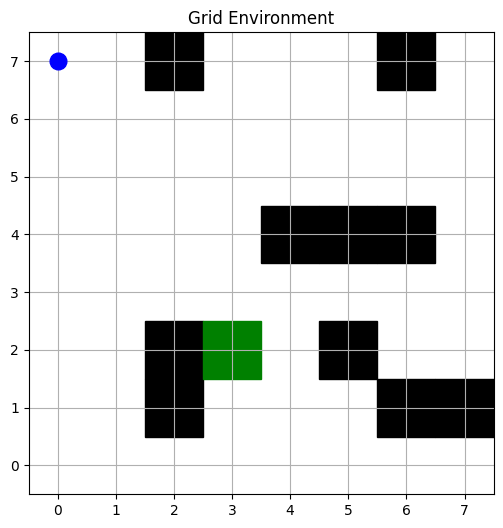

In [10]:

# 1) Create your env however you like:
obstacle_env = GridDockEnv(
    grid_size=(8,8),
    spawn_mode='random',
    obstacle_count=10,            
    cell_size=64,
    fps=5
)

plot_environment(obstacle_env, figsize=(6,6))


DQN Training: 100%|██████████| 1000/1000 [00:29<00:00, 34.20it/s, Reward=-200.0, ε=0.010]


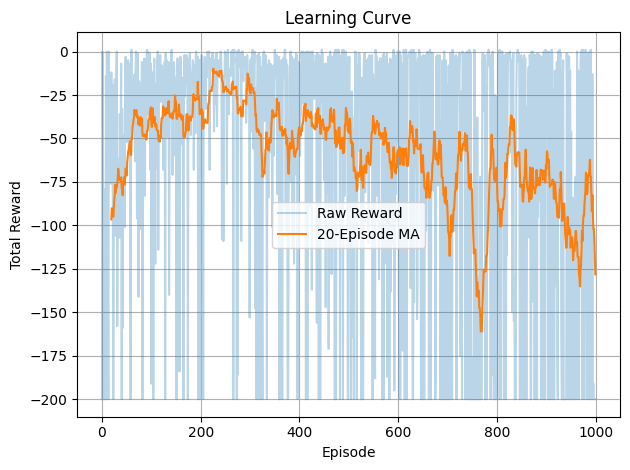

Training complete! DQN‐network saved.


In [11]:
obstacle_dqn_agent = DQNAgent(obstacle_env,
                 hidden_dims=[128,128],
                 lr=1e-3,
                 gamma=0.95,
                 epsilon_decay=0.995,
                 batch_size=64,
                 buffer_size=5000,
                 target_update=20)

rewards = train_dqn(obstacle_env, obstacle_dqn_agent, episodes=1000, max_steps=200)
plot_rewards(rewards)

# Save your network weights
obstacle_dqn_agent.save("../models/obstacle_dqn_griddock.pth")
print("Training complete! DQN‐network saved.") 

In [12]:
success_rate, avg_steps = evaluate_agent(obstacle_env, obstacle_dqn_agent,
                                         episodes=1000,
                                         max_steps=200)

print(f"Success rate: {success_rate*100:.1f}%   Avg steps (when successful): {avg_steps:.1f}")

# 4) Inline HTML5 animation
anim = animate_agent_matplotlib(obstacle_env, obstacle_dqn_agent,
                                max_steps=200,
                                delay=0.1,
                                figsize=(6,6))
from IPython.display import display
display(anim)

Success rate: 29.6%   Avg steps (when successful): 3.8


In [13]:
obstacle_env_LiDAR = GridDockEnv(
    grid_size=(8,8),
    spawn_mode='random',
    obstacle_count=10,
    lidar=True,           # ← turn on LiDAR in the env
    lidar_range=10
)

LiDAR_agent = DQNAgent(
    obstacle_env_LiDAR,
    hidden_dims=[128,128],
    lr=1e-3,
    gamma=0.95,
    epsilon_start=1.0,
    epsilon_min=0.01,
    epsilon_decay=0.995,
    batch_size=64,
    buffer_size=5000,
    target_update=20,
    use_lidar=True,       # ← let the agent expect 6‐dim observations
    lidar_range=10
)

DQN Training: 100%|██████████| 1000/1000 [00:24<00:00, 41.17it/s, Reward=-500.0, ε=0.010]

Training complete!


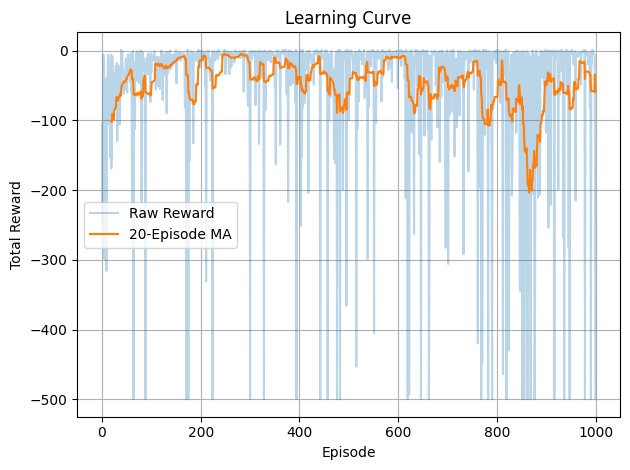

DQN‐network saved.


In [14]:
rewards = train_dqn(obstacle_env_LiDAR, LiDAR_agent, episodes=1000, max_steps=500)
print("Training complete!")
plot_rewards(rewards)

# Save your network weights
LiDAR_agent.save("../models/lidar_dqn_griddock.pth")
print("DQN‐network saved.") 

In [15]:
success_rate, avg_steps = evaluate_agent(obstacle_env_LiDAR, LiDAR_agent,
                                         episodes=1000,
                                         max_steps=50)

print(f"Success rate: {success_rate*100:.1f}%   Avg steps (when successful): {avg_steps:.1f}")

# 4) Inline HTML5 animation
anim = animate_agent_matplotlib(obstacle_env_LiDAR, LiDAR_agent,
                                max_steps=200,
                                delay=0.1,
                                figsize=(6,6))
from IPython.display import display
display(anim)

Success rate: 50.3%   Avg steps (when successful): 4.7


DQN Training: 100%|██████████| 1000/1000 [00:23<00:00, 41.92it/s, Reward=-3.0, ε=0.010] 


Training complete!


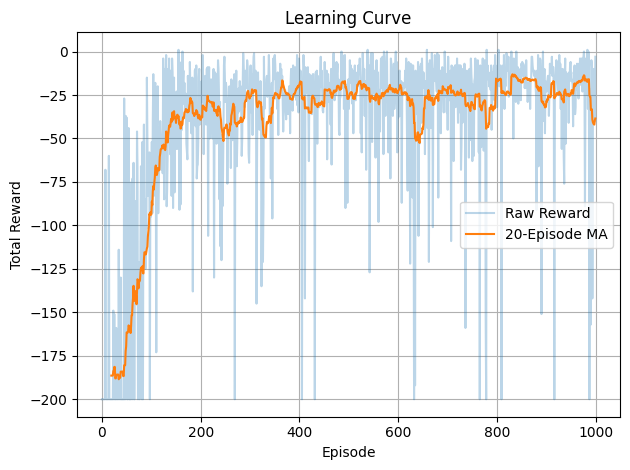

DQN‐network saved.


In [48]:
# 1) build env with history
obstacle_env_LiDAR_history = GridDockEnv(
                  grid_size=(20,20),
                  spawn_mode='random',
                  obstacle_count=30,
                  lidar=True, 
                  lidar_range=10,
                  use_history=True,
                  history_length=10)

# 2) build agent with history
LiDAR_history_agent = DQNAgent(obstacle_env_LiDAR_history,
                 hidden_dims=[128,128],
                 lr=1e-3, 
                 gamma=0.95,
                 epsilon_start=1.0, 
                 epsilon_min=0.01, 
                 epsilon_decay=0.995,
                 batch_size=64, 
                 buffer_size=5000, 
                 target_update=20,
                 use_history=True,
                 history_length=10)

rewards = train_dqn(obstacle_env_LiDAR_history, LiDAR_history_agent, episodes=1000, max_steps=200)
print("Training complete!")
plot_rewards(rewards)

# Save your network weights
LiDAR_agent.save("../models/history_lidar_dqn_griddock.pth")
print("DQN‐network saved.") 

In [50]:
success_rate, avg_steps = evaluate_agent(obstacle_env_LiDAR_history, LiDAR_history_agent,
                                         episodes=2000,
                                         max_steps=100)

print(f"Success rate: {success_rate*100:.1f}%   Avg steps (when successful): {avg_steps:.1f}")

# 4) Inline HTML5 animation
anim = animate_agent_matplotlib(obstacle_env_LiDAR_history, LiDAR_history_agent,
                                max_steps=200,
                                delay=0.1,
                                figsize=(6,6))
from IPython.display import display
display(anim)

Success rate: 89.0%   Avg steps (when successful): 16.8
